In [1]:
import numpy as np
import cvxpy as cp
import random
import pandas as pd


In [2]:
n = 10000    # number of bidders
m = 10       # type of resources

A = pd.read_csv("A_3.csv")
pi = pd.read_csv("pi_3.csv")

A = np.array(A)
pi = np.array(pi)
pi = pi.T
b = np.array([1000 for _ in range(m)])  

In [3]:
x = cp.Variable(n)
ee = np.ones(n)
objective = cp.Maximize(pi@x)
constraints = [A@x <= b, x >= 0, x <= ee]
prob = cp.Problem(objective, constraints)
prob.solve()
opv1 = prob.value

In [5]:
def u(s,w):
    value = 0
    for i in range(m):
        value += w/m * cp.log(s[i])
    return value
def u_2(s,a,w):
    value = 0
    for i in range(m):
        value += w/m * (1-cp.exp(-a*s[i]))
    return value

In [6]:
def dynamicLearning(start, k, xp, xk, w):
	A1 = A[:m, :k]
	pi1 = pi[:,:k]
	x = cp.Variable(k)
	s = cp.Variable(m)
	# print(x.shape)
	obj = cp.Maximize(pi1@x + u(s,w))
	cons = [A1@x + s <= k/n * b, x>=0, x<=1, s >= 0]
	prob = cp.Problem(obj, cons)
	prob.solve(solver="SCS")
	P = prob.constraints[0].dual_value
	AT = A.T

	xpNow = xp
	xkNow = xk
	for i in range(start, 2*k):
		if i >= n:
			# print(xkNow)
			global xTrue
			xTrue = xkNow
			return xkNow
		
		cri = (AT[i].dot(P))
		if(pi[0][i] > cri):
			xpNow.append(1)
		else:
			xpNow.append(0)

		test = 1
		for j in range(m):
			temp1 = A[j,i]*xpNow[i]
			temp2 = b[j] - (A[j:j+1, :i]).dot(np.array(xkNow))
			# print(i)
			# print(len(xkNow))
			if temp1 > temp2:
				test = 0
				break
		if test == 1:
			xkNow.append(xpNow[i])
		else:
			xkNow.append(0)

	dynamicLearning(2*k, 2*k, xpNow, xkNow, w)
	return xTrue
		

In [28]:
import math

def dynamicLearning_withE(start, k, xp, xk, w):
	A1 = A[:m, :k]
	pi1 = pi[:,:k]
	x = cp.Variable(k)
	s = cp.Variable(m)
	# print(x.shape)
	obj = cp.Maximize(pi1@x + u(s,w))
	cons = [A1@x + s <= k/n * b* (1.0-(50.0/10000)*math.sqrt(10000.0/k)), x>=0, x<=1, s >= 0]
	prob = cp.Problem(obj, cons)
	prob.solve(solver="SCS")
	P = prob.constraints[0].dual_value
	AT = A.T

	xpNow = xp
	xkNow = xk
	for i in range(start, 2*k):
		if i >= n:
			# print(xkNow)
			global xTrue_withE
			xTrue_withE = xkNow
			return xkNow
		
		cri = (AT[i].dot(P))
		if(pi[0][i] > cri):
			xpNow.append(1)
		else:
			xpNow.append(0)

		test = 1
		for j in range(m):
			temp1 = A[j,i]*xpNow[i]
			temp2 = b[j] - (A[j:j+1, :i]).dot(np.array(xkNow))
			# print(i)
			# print(len(xkNow))
			if temp1 > temp2:
				test = 0
				break
		if test == 1:
			xkNow.append(xpNow[i])
		else:
			xkNow.append(0)

	dynamicLearning_withE(2*k, 2*k, xpNow, xkNow, w)
	return xTrue_withE

In [8]:
Anow = A
Anow = Anow.T
# print(Anow.shape)
piNow = (pi.T)
piNow = np.reshape(piNow, (n,))
bNow = b
bNow = bNow.T

temp = m+n
y = cp.Variable(temp)
e = np.ones(n)
objective = cp.Minimize(bNow@(y[:m]) + e@(y[m:]))
constraints = [(Anow@(y[:m])+ (y[m:]))>= piNow, y >= 0]
prob = cp.Problem(objective, constraints)

prob.solve()
P = y[:m].value
p_truth = P
P

array([ 1.04581214,  2.05604972,  3.06239824,  4.07860401,  5.09664173,
        6.06381518,  7.06742707,  8.07094188,  9.0689332 , 10.08168534])

In [22]:
# def dynamicLearning_u_2(start, k, xp, xk, a, w):
# 	A1 = A[:m, :k]
# 	pi1 = pi[:,:k]
# 	x = cp.Variable(k)
# 	s = cp.Variable(m)
# 	# print(x.shape)
# 	obj = cp.Maximize(pi1@x + u_2(s,a,w))
# 	cons = [A1@x + s <= k/n * b, x>=0, x<=1, s >= 0]
# 	prob = cp.Problem(obj, cons)
# 	prob.solve(solver="SCS")
# 	P = prob.constraints[0].dual_value
# 	AT = A.T

# 	xpNow = xp
# 	xkNow = xk
# 	for i in range(start, 2*k):
# 		if i >= n:
# 			# print(xkNow)
# 			global xTrue
# 			xTrue = xkNow
# 			return xkNow
		
# 		cri = (AT[i].dot(P))
# 		if(pi[0][i] > cri):
# 			xpNow.append(1)
# 		else:
# 			xpNow.append(0)

# 		test = 1
# 		for j in range(m):
# 			temp1 = A[j,i]*xpNow[i]
# 			temp2 = b[j] - (A[j:j+1, :i]).dot(np.array(xkNow))
# 			# print(i)
# 			# print(len(xkNow))
# 			if temp1 > temp2:
# 				test = 0
# 				break
# 		if test == 1:
# 			xkNow.append(xpNow[i])
# 		else:
# 			xkNow.append(0)

# 	dynamicLearning_u_2(2*k, 2*k, xpNow, xkNow, a, w)
# 	return xTrue
		

In [ ]:
# l_different_w = []
# for i in range(1,50):
#     w = i
#     xk = [0]*50
#     xp = [0]*50
#     l_decision = np.array(dynamicLearning(50, 50, xp, xk, w))
#     opv2 = (np.dot(pi,l_decision)[0])
#     l_different_w.append(opv2)
#     print("when w =", w)
#     print("the competetive ratio is", opv2/opv1)

In [29]:
# l_u_2 = []
# w = 17
# for i in range(1,10):
#     a = i
#     xk = [0]*50
#     xp = [0]*50
#     l_decision = np.array(dynamicLearning_u_2(50, 50, xp, xk, a, w))
#     opv2 = (np.dot(pi,l_decision)[0])
#     l_u_2.append(opv2/opv1)
#     print("when a =", a)
#     print("the competetive ratio is", opv2/opv1)

when a = 1
the competetive ratio is 0.9875886924334026
when a = 2
the competetive ratio is 0.986981578255691
when a = 3
the competetive ratio is 0.9867732749003879
when a = 4
the competetive ratio is 0.9861591995265986
when a = 5
the competetive ratio is 0.9856326829971931
when a = 6
the competetive ratio is 0.9855789857820276
when a = 7
the competetive ratio is 0.9855789857820276
when a = 8
the competetive ratio is 0.9855381696447184
when a = 9
the competetive ratio is 0.9855381696447184


In [29]:
w = 17
xk = [0]*50
xp = [0]*50
# xTrue = []
l_decision = np.array(dynamicLearning(50, 50, xp, xk, w))
# dynamicLearning(50, 50, xp, xk, w)
# xTrue = np.array(xTrue)
opv2 = (np.dot(pi,l_decision)[0])
# opv2 = (np.dot(pi,xTrue)[0])
print("when w =", w)
print("the competetive ratio is", opv2/opv1)

when w = 17
the competetive ratio is 0.9882796415731907


In [30]:
# xTrue_withE = []

w = 17
xk = [0]*50
xp = [0]*50
l_decision_withE = np.array(dynamicLearning_withE(50, 50, xp, xk, w))
# xTrue_withE = np.array(xTrue_withE)
opv2 = (np.dot(pi,l_decision_withE)[0])
print("when w =", w)
print("the competetive ratio is", opv2/opv1)

when w = 17
the competetive ratio is 0.9875400830617074


In [31]:
index = []
for k in range(10000):
    index.append(k)
    
x = np.array(list(x.value))

In [33]:
l_dif = []
l_ratio = []
# print(pi.shape)
# print(xTrue.shape)
for k in range(10000):
    y = (pi[:,:(k+1)].dot(l_decision[:(k+1)]))[0]
    e_opt = (pi[:,:(k+1)].dot(x[:(k+1)]))[0]
    l_dif.append(y-e_opt)
    l_ratio.append(y/e_opt)
    # print(y-e_opt)
print(len(l_dif))

10000


In [35]:
l_dif_ = pd.DataFrame(np.array(l_dif))
l_dif_.to_csv('data/Q5/l_dif_.csv',index=False)

l_ratio_ = pd.DataFrame(np.array(l_ratio))
l_ratio_.to_csv('data/Q5/l_ratio_.csv',index=False)

In [38]:
l_dif_withE = []
l_ratio_withE = []

for k in range(10000):
    y = (pi[:,:(k+1)].dot(l_decision_withE[:(k+1)]))[0]
    e_opt = (pi[:,:(k+1)].dot(x[:(k+1)]))[0]
    l_dif_withE.append(y-e_opt)
    l_ratio_withE.append(y/e_opt)

In [39]:
l_dif_withE_ = pd.DataFrame(np.array(l_dif_withE))
l_dif_withE_.to_csv('data/Q5/l_dif_withE_.csv',index=False)

l_ratio_withE_ = pd.DataFrame(np.array(l_ratio_withE))
l_ratio_withE_.to_csv('data/Q5/l_ratio_withE_.csv',index=False)

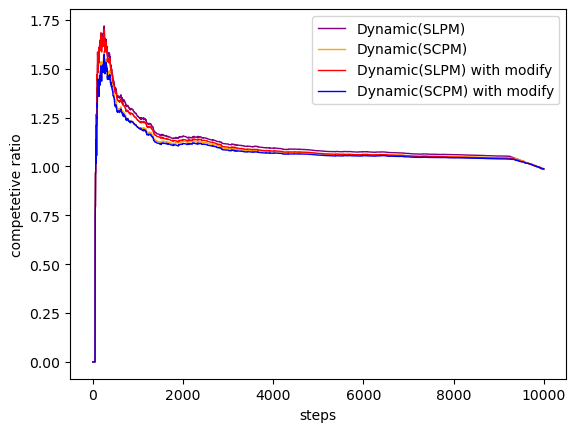

In [40]:
import matplotlib.pyplot as plt
Q2_ratio = pd.read_csv("data/Q2/l_ratio_.csv")
Q2_ratio_withE = pd.read_csv("data/Q2/l_ratio_withE_.csv")
Q2_ratio = np.array(Q2_ratio)
Q2_ratio_withE = np.array(Q2_ratio_withE)



plt.plot(index, Q2_ratio, color='purple', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SLPM)")
plt.plot(index, l_ratio, color='orange', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SCPM)")
plt.plot(index, Q2_ratio_withE, color='red', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SLPM) with modify")
plt.plot(index, l_ratio_withE, color='blue', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SCPM) with modify")
plt.xlabel("steps")
plt.ylabel("competetive ratio")
# plt.title("competetive ratio respect to different values of k in SLPM and SCPM")
plt.legend()
plt.savefig("plot/Q5_Dynamic_ratio.jpg", dpi=400)
plt.show()

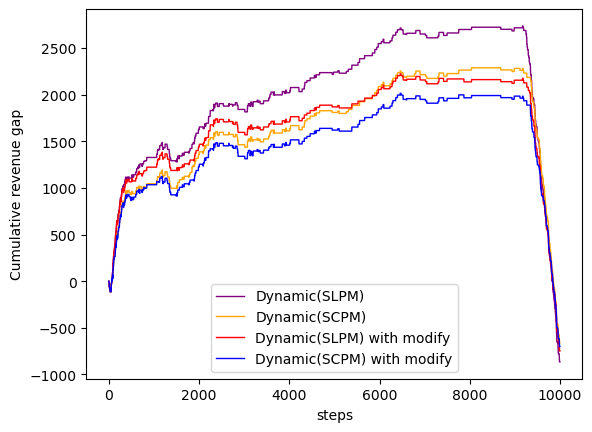

In [41]:
Q2_dif = pd.read_csv("data/Q2/l_dif_.csv")
Q2_dif_withE = pd.read_csv("data/Q2/l_dif_withE_.csv")
Q2_dif = np.array(Q2_dif)
Q2_dif_withE = np.array(Q2_dif_withE)



plt.plot(index, Q2_dif, color='purple', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SLPM)")
plt.plot(index, l_dif, color='orange', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SCPM)")
plt.plot(index, Q2_dif_withE, color='red', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SLPM) with modify")
plt.plot(index, l_dif_withE, color='blue', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SCPM) with modify")
plt.xlabel("steps")
plt.ylabel("Cumulative revenue gap")
# plt.title("competetive ratio respect to different values of k in SLPM and SCPM")
plt.legend()
plt.savefig("plot/Q5_Dynamic_gap.jpg", dpi=400)
plt.show()

In [56]:


Q8_X = pd.read_csv("data/Q8/X_sgd_.csv")
Q8_X = np.array(Q8_X)
print(Q8_X.shape)

print(Q8_X[0][0])
# Q8_X = Q8_X.reshape(1,10000)
print(Q8_X.shape)
print(Q8_X[:2])

(10000, 10)
(10000, 1)
1
(10000, 1)
[[1]
 [1]]


In [57]:
l_dif_Q8 = []
l_ratio_Q8 = []
# print(pi.shape)
# print(xTrue.shape)
for k in range(10000):
    y = (pi[:,:(k+1)].dot(Q8_X[:(k+1)]))[0]
    e_opt = (pi[:,:(k+1)].dot(x[:(k+1)]))[0]
    l_dif_Q8.append(y-e_opt)
    l_ratio_Q8.append(y/e_opt)



10000


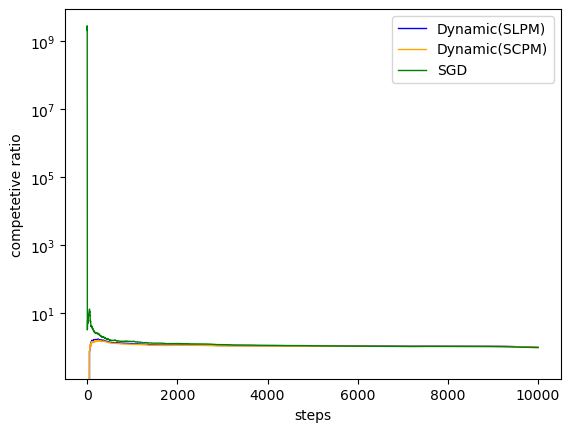

In [65]:

plt.plot(index, Q2_ratio, color='blue', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SLPM)")
plt.plot(index, l_ratio, color='orange', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SCPM)")
plt.plot(index, l_ratio_Q8, color='green', linestyle='solid', linewidth=1, markersize=4, label="SGD")
plt.xlabel("steps")
plt.ylabel("competetive ratio")
# plt.title("competetive ratio respect to different values of k in SLPM and SCPM")
plt.legend()
plt.yscale('log')
plt.savefig("plot/SGD_Dynamic_ratio.jpg", dpi=400)
plt.show()

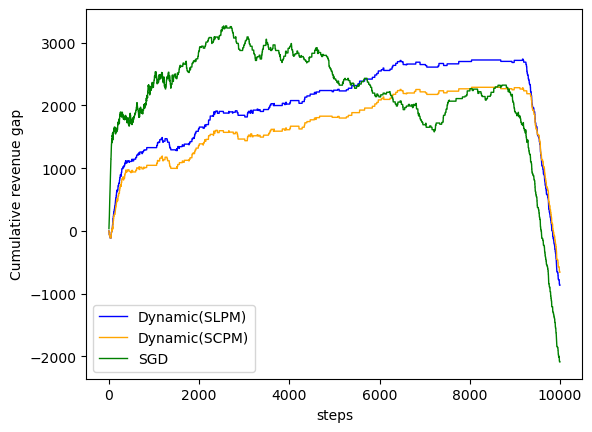

In [79]:
plt.plot(index, Q2_dif, color='blue', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SLPM)")
plt.plot(index, l_dif, color='orange', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SCPM)")
plt.plot(index, l_dif_Q8, color='green', linestyle='solid', linewidth=1, markersize=4, label="SGD")
plt.xlabel("steps")
plt.ylabel("Cumulative revenue gap")
# plt.title("competetive ratio respect to different values of k in SLPM and SCPM")
plt.legend()
plt.savefig("plot/SGD_Dynamic_gap.jpg", dpi=400)
plt.show()

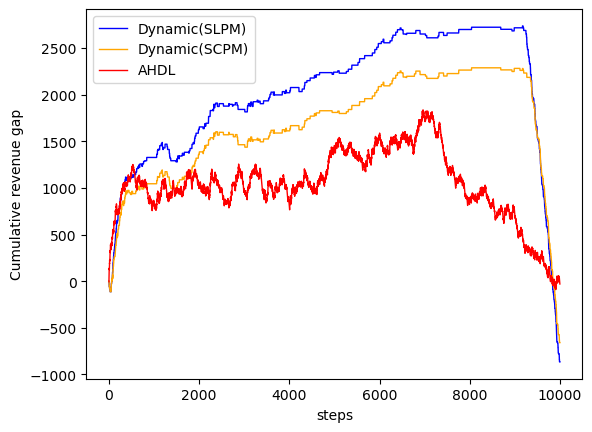

In [81]:
Q6_gap = pd.read_csv("data/Q6/gap(1).csv")
Q6_gap = np.array(Q6_gap)
Q6_gap = Q6_gap.tolist()

plt.plot(index, Q2_dif, color='blue', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SLPM)")
plt.plot(index, l_dif, color='orange', linestyle='solid', linewidth=1, markersize=4, label="Dynamic(SCPM)")
plt.plot(index, Q6_gap, color='red', linestyle='solid', linewidth=1, markersize=4, label="AHDL")
plt.xlabel("steps")
plt.ylabel("Cumulative revenue gap")
# plt.title("competetive ratio respect to different values of k in SLPM and SCPM")
plt.legend()
plt.savefig("plot/AHDL_Dynamic_gap.jpg", dpi=400)
plt.show()

[0.  0.9 0.  0.9 0.9 0.9 0.  0.9 0.  0.9]
(10000, 1)
10000


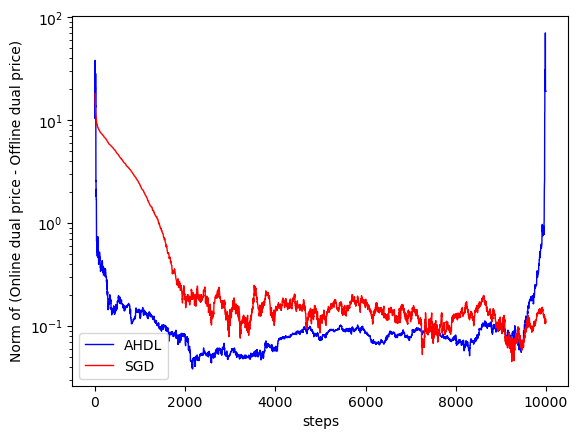

In [77]:
Q8_price = pd.read_csv("data/Q8/price_.csv")
Q8_price = np.array(Q8_price)
print(Q8_price[0])

Q6_price = pd.read_csv("data/Q6/price(2).csv")
Q6_price = np.array(Q6_price)
print(Q6_price.shape)
Q6_price = Q6_price.tolist()
print(len(Q6_price))

Q8Pri = []
# pList = []
# pNorm = np.linalg.norm(p_truth)
for i in range(Q8_price.shape[0]):
    Q8Pri.append(np.linalg.norm(Q8_price[i]- p_truth))
    # pList.append(pNorm)



plt.plot(index, Q6_price, color='blue', linestyle='solid', linewidth=1, markersize=4, label="AHDL")
plt.plot(index, Q8Pri, color='red', linestyle='solid', linewidth=1, markersize=4, label="SGD")
# plt.plot(index, pList, color='green', linestyle='solid', linewidth=1, markersize=4, label="Offline")
plt.xlabel("steps")
plt.ylabel("Norm of (Online dual price - Offline dual price)")
plt.yscale('log')
# plt.title("competetive ratio respect to different values of k in SLPM and SCPM")
plt.legend()
plt.savefig("plot/SGD_AHDL_price.jpg", dpi=400)
plt.show()
    





